In [1]:
# import packages

import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

## HTML page structure

**Hypertext Markup Language (HTML)** is the standard markup language for documents designed to be displayed in a web browser. HTML describes the structure of a web page and it can be used with **Cascading Style Sheets (CSS)** and a scripting language such as **JavaScript** to create interactive websites. HTML consists of a series of elements that "tell" to the browser how to display the content. Lastly, elements are represented by **tags**.

Here are some tags:
* `<!DOCTYPE html>` declaration defines this document to be HTML5.  
* `<html>` element is the root element of an HTML page.  
* `<div>` tag defines a division or a section in an HTML document. It's usually a container for other elements.
* `<head>` element contains meta information about the document.  
* `<title>` element specifies a title for the document.  
* `<body>` element contains the visible page content.  
* `<h1>` element defines a large heading.  
* `<p>` element defines a paragraph.  
* `<a>` element defines a hyperlink.

HTML tags normally come in pairs like `<p>` and `</p>`. The first tag in a pair is the opening tag, the second tag is the closing tag. The end tag is written like the start tag, but with a slash inserted before the tag name.

<img src="https://storage.googleapis.com/pet-detect-239118/text_retrieval/tags.png" width="512">

HTML has a tree-like 🌳 🌲 structure thanks to the **Document Object Model (DOM)**, a cross-platform and language-independent interface. Here's how a very simple HTML tree looks like.

<img src="https://storage.googleapis.com/pet-detect-239118/text_retrieval/dom_tree.gif">

Create and display a simple HTML page

In [2]:
from IPython.core.display import display, HTML

In [3]:
display(HTML("""
<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
  <title>Intro to HTML</title>
</head>

<body>
  <h1>Heading h1</h1>
  <h2>Heading h2</h2>
  <h3>Heading h3</h3>
  <h4>Heading h4</h4>

  <p>
    That's a text paragraph. You can also <b>bold</b>, <mark>mark</mark>, <ins>underline</ins>, <del>strikethrough</del> and <i>emphasize</i> words.
    You can also add links - here's one to <a href="https://en.wikipedia.org/wiki/Main_Page">Wikipedia</a>.
  </p>

  <p>
    This <br> is a paragraph <br> with <br> line breaks
  </p>

  <p style="color:red">
    Add colour to your paragraphs.
  </p>

  <p>Unordered list:</p>
  <ul>
    <li>Python</li>
    <li>R</li>
    <li>Julia</li>
  </ul>

  <p>Ordered list:</p>
  <ol>
    <li>Data collection</li>
    <li>Exploratory data analysis</li>
    <li>Data analysis</li>
    <li>Policy recommendations</li>
  </ol>
  <hr>

  <!-- This is a comment -->

</body>
</html>
"""))

Get the website & extracting the data

In [4]:
webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")

# get the content of the website using html.parser into a variable
soup = BeautifulSoup(webpage.content, "html.parser")

In [5]:
soup.find(name="table")

<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>

* The table is embedded by "\<table> \</table>"
* Each row of the table is embedded by \<tr> \</tr>
* Each cell is embedded by \<td> \</td>

In [6]:
# get the Rating score of all chocolate bars
rating_column = soup.find_all(attrs={"class": "Rating"})
rating_list = []
for x in rating_column[1:] :   # skip the first element, the column name
   rating_list.append(float(x.get_text()))  # convert string to float

In [7]:
# get the Cocoa Percent of all chocolate bars
cocoa_column = soup.find_all(attrs={"class": "CocoaPercent"})
cocoa_list = []
for x in cocoa_column[1:] :   # skip the first element, the column name
   cocoa_list.append(float((x.get_text()).strip('%'))/100)  # convert percentage string to float

In [8]:
cocoa_list[:5]

[0.63, 0.7, 0.7, 0.7, 0.7]

Put the two column together into a dataframe

In [9]:
data = {"Rating": rating_list, "Cocoa": cocoa_list}
data_frame = pd.DataFrame.from_dict(data)

In [10]:
data_frame.head()

,Rating,Cocoa
0,3.75,0.63
1,2.75,0.70
2,3.00,0.70
3,3.50,0.70
4,3.50,0.70


In [11]:
z = np.polyfit(x=data_frame['Cocoa'], y=data_frame['Rating'], deg=1) # try to fit cocoa percentage versus rating score in a linear function
# get the intercep value and the slope value
z

array([-1.24613086,  4.07938814])

In [12]:
line_func = np.poly1d(z)

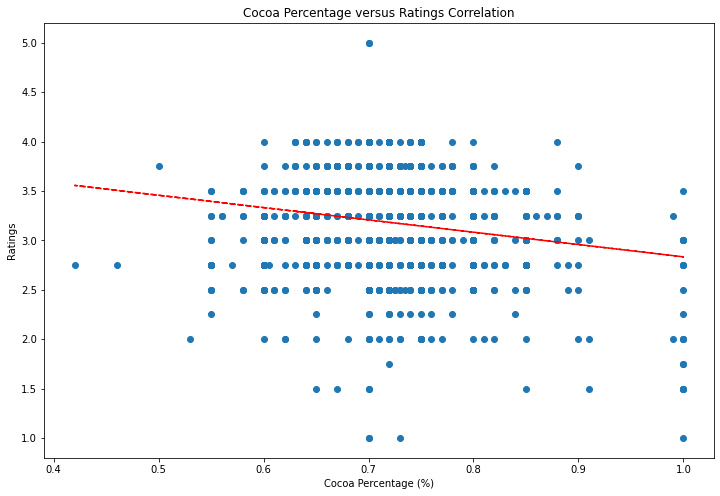

In [13]:
plt.figure(figsize=(12,8))

plt.scatter(data_frame['Cocoa'], data_frame['Rating'])
plt.title('Cocoa Percentage versus Ratings Correlation')
plt.xlabel('Cocoa Percentage (%)')
plt.ylabel('Ratings')
plt.plot(data_frame['Cocoa'], line_func(data_frame['Cocoa']), "r--")
plt.show()

# Use Scrapy to scrape reddit

Scrapy is a Python package to easily develop a spider, a Scrapy object to scrape a website for particular purposes.


In [14]:
!pip install scrapy

     |████████████████████████████████| 254 kB 5.4 MB/s 
     |████████████████████████████████| 3.2 MB 33.6 MB/s 
     |████████████████████████████████| 65 kB 3.0 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 251 kB 57.7 MB/s 
     |████████████████████████████████| 47 kB 4.1 MB/s 
     |████████████████████████████████| 3.1 MB 51.4 MB/s 
     |████████████████████████████████| 3.5 MB 43.5 MB/s 
     |████████████████████████████████| 74 kB 2.4 MB/s 
  Created wheel for protego: filename=Protego-0.1.16-py3-none-any.whl size=7782 sha256=f7c7152465f0901d99f0c5c5781232f10df44bf9e12ac72cec2654bc35612c7b
  Stored in directory: /root/.cache/pip/wheels/ca/44/01/3592ccfbcfaee4ab297c4097e6e9dbe1c7697e3531a39877ab
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=11515 sha256=78e1c7d362740b5b508fbeb5831060ac2c5dea09ba05ea79d2c0b495f34a4c71
  Stored in directory: /root/.cache/pip/wheels/2d/18/21/3c6a732eaa

Create the reddit scraping project

from the current path, after running the command below, you should have a "reddit" folder

Inside the "./reddit/spiders/", you should found the "items.py" script, use this to build the spider object

Open the items.py by double-click the file, add the following code
* change class RedditItem to class PostItem(scrapy.Item):


<img src="https://storage.googleapis.com/pet-detect-239118/text_retrieval/itemsPY.JPG">

The file will be automatically save when you close it.

Create the web scraping project

In [15]:
!scrapy startproject reddit

New Scrapy project 'reddit', using template directory '/usr/local/lib/python3.7/dist-packages/scrapy/templates/project', created in:
    /content/reddit

You can start your first spider with:
    cd reddit
    scrapy genspider example example.com


In [16]:
# walk into the project folder
import os
os.chdir('/content') # make sure you start from the default path
os.chdir('/content/reddit')

In [17]:
!ls

reddit	scrapy.cfg


Start to scrape the website

For the XPath syntax, please refer to: https://en.wikipedia.org/wiki/XPath

Create a new Python script "reddit_spider.py" inside the "spiders" folder by right-click the "/reddit/riddit/spiders" folder, then select "New file"

Copy the following code to the "reddit_spider.py" script

<img src="https://storage.googleapis.com/pet-detect-239118/text_retrieval/next_page.png">

The next_selector is to get the next page button

In [87]:
import scrapy
from items import PostItem
from scrapy.loader import ItemLoader
from scrapy.loader.processors import MapCompose, Join
import datetime
import re
from scrapy.http.request import Request


class RedditSpider(scrapy.Spider):
  # define the name of the spider (use later to start the scraper from the command line)
  name = "post"
  # give the start URL, you can add more than one starting url in the list
  start_urls = ['https://old.reddit.com/']

  def parse(self, response):
    def format_comment(x):
      res = int(re.sub("[^0-9]", "", x))
      return res
    # set the Pagination action
    next_selector = response.xpath('//span[@class="next-button"]/a/@href')

    # all of the posts are contained within a <div> with the id of "siteTable", 
    # then select all of the child div elements with a class containing the word thing
    for p in response.xpath('//div[@id="siteTable"]/div[contains(@class, "thing")]'):
      l = ItemLoader(item=PostItem(), selector=p)
      l.add_xpath('title', ['.//a[@class="title may-blank "]/text()', './/a[@class="title may-blank outbound"]/text()'], MapCompose(str.strip, str.title))
      l.add_xpath('user','.//p[@class="tagline "]/a[1]/text()')
      l.add_xpath('upvotes','.//div[@class="score likes"]/@title', MapCompose(int))
      l.add_xpath('comments','.//a[contains(@data-event-action, "comments")]/text()', MapCompose(lambda x:format_comment(x)))
      l.add_xpath('subreddit', './/p[@class="tagline "]/a[2]/text()')
      l.add_xpath('content_link', './/a[contains(@data-event-action, "title")]/@href')
      l.add_xpath('awards', ['.//a[@class="awarding-link"]/@data-count', './/a[@class="awarding-show-more-link"]/text()'], MapCompose(lambda x: format_comment(x)))
      l.add_xpath('time', './/time/@datetime')
      yield l.load_item()
    # Pagination - not just scrape the first page, need to scrape as many pages as possible
    for url in next_selector.extract():
      yield Request(url, callback=self.parse)

In [21]:
!pwd

/content/reddit


In this demo, since we work in the Colab environment, we also add the PostItem class inside the reddit_spider.py script, instead of importing from an external file.

Copy and paste the following cell inside the reddit_spider.py file, on the top of the ReddictSpider class

In [ ]:
class PostItem(scrapy.Item):
  # define the fields for your item here like:
  # name = scrapy.Field()
  title = scrapy.Field()
  user = scrapy.Field()
  upvotes = scrapy.Field()
  comments = scrapy.Field()
  subreddit = scrapy.Field()
  content_link = scrapy.Field()
  awards = scrapy.Field()
  time = scrapy.Field()

The command line below will let the spider named "post" to scrape 1000 items (posts) then to automatically stop scraping, saving all of the posts in .json format in a file called posts.json.

Before running the spider, you need to let your spider to disobey the robots.txt file of the website. In real situation, this action can let the website ban your access or even consider you are launching a cyble attack.

To let the spider disobey the rules, open the settings.py file of the scrapy project, finding the option that says ROBOTSTXT_OBEY and setting it to False.

<img src="https://storage.cloud.google.com/pet-detect-239118/text_retrieval/obey.JPG">

In [23]:
!scrapy crawl post -s CLOSESPIDER_ITEMCOUNT=100 -o posts.json

2021-11-02 05:19:25 [scrapy.utils.log] INFO: Scrapy 2.5.1 started (bot: reddit)
2021-11-02 05:19:25 [scrapy.utils.log] INFO: Versions: lxml 4.2.6.0, libxml2 2.9.8, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.7.0, Python 3.7.12 (default, Sep 10 2021, 00:21:48) - [GCC 7.5.0], pyOpenSSL 21.0.0 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 35.0.0, Platform Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
2021-11-02 05:19:25 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2021-11-02 05:19:25 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'reddit',
 'CLOSESPIDER_ITEMCOUNT': '100',
 'NEWSPIDER_MODULE': 'reddit.spiders',
 'SPIDER_MODULES': ['reddit.spiders']}
2021-11-02 05:19:25 [scrapy.extensions.telnet] INFO: Telnet Password: 76ffde2fa6a8b7a6
2021-11-02 05:19:25 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scr

In [27]:
import json

filename = 'posts.json'

with open(filename) as json_data:
  data = json.load(json_data)


In [49]:
data_dict = {}
for key in keys:
  data_dict[key] = []

for row in data:
  for key in keys:
    data_dict[key].append(row[key][0])


In [51]:
data_df = pd.DataFrame.from_dict(data_dict)

In [53]:
data_df.head(5)

,title,user,upvotes,comments,subreddit,content_link,awards,time
0,What Do You Not Own Enough Of?,Sentient-Sock,31421,17719,r/AskReddit,/r/AskReddit/comments/qkk3p0/what_do_you_not_o...,41,2021-11-01T18:17:28+00:00
1,President Biden Dozes Off At The Global Climat...,fadeaway119slowly,58611,11464,r/PublicFreakout,/r/PublicFreakout/comments/qklecr/president_bi...,24,2021-11-01T19:17:16+00:00
2,[Oc] Do You Belief In Ghosts?,GradientMetrics,46257,4815,r/dataisbeautiful,/r/dataisbeautiful/comments/qkeyvm/oc_do_you_b...,13,2021-11-01T14:17:36+00:00
3,Found In The Wild,minorthreat1000,74665,5122,r/PoliticalHumor,/r/PoliticalHumor/comments/qkh7k3/found_in_the...,62,2021-11-01T16:04:40+00:00
4,Only 34 Police Officers Defy New York’S Vaccin...,dingo8yobb,12337,558,r/politics,https://www.independent.co.uk/news/world/ameri...,1,2021-11-02T01:19:01+00:00
